<a href="https://colab.research.google.com/github/sujithsomsetty/HeartDiseaseAnalysis/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import requests
import matplotlib.pyplot as plt

import pyspark

In [ ]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# Load the dataset
file_path = './heart.csv'
df = pd.read_csv(file_path)

print("Missing values per column:")
print(df.isnull().sum())
#


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:

# If there are any missing values, decide on a strategy:
# For numerical columns, consider filling missing values with the median or mean
# For categorical columns, consider using the mode or marking them as 'Unknown'

# Example: Filling missing 'age' values with the median age
df['age'].fillna(df['age'].median(), inplace=True)
#

In [ ]:
# Convert data types if necessary
# Example: Converting 'chol' from float to int
df['chol'] = df['chol'].astype(int)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# Data Analysis & Visualization

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std

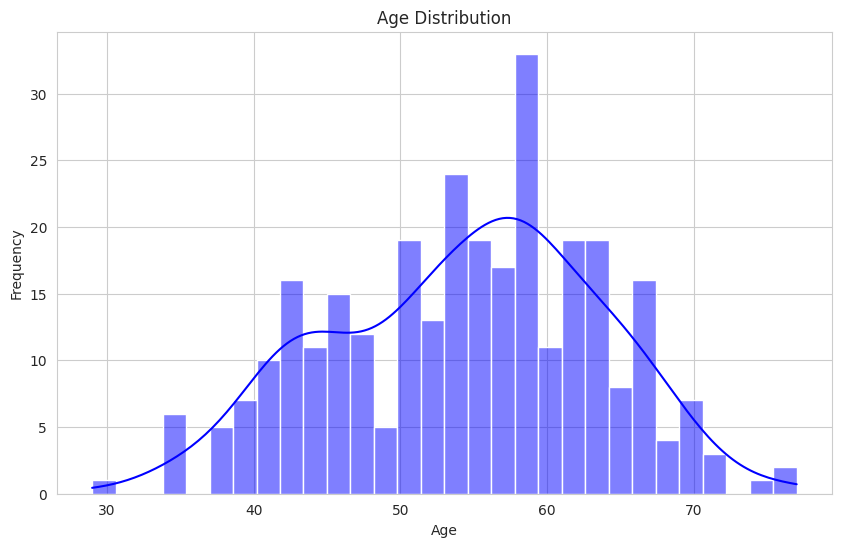

In [ ]:
# Distribution of age among patients
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

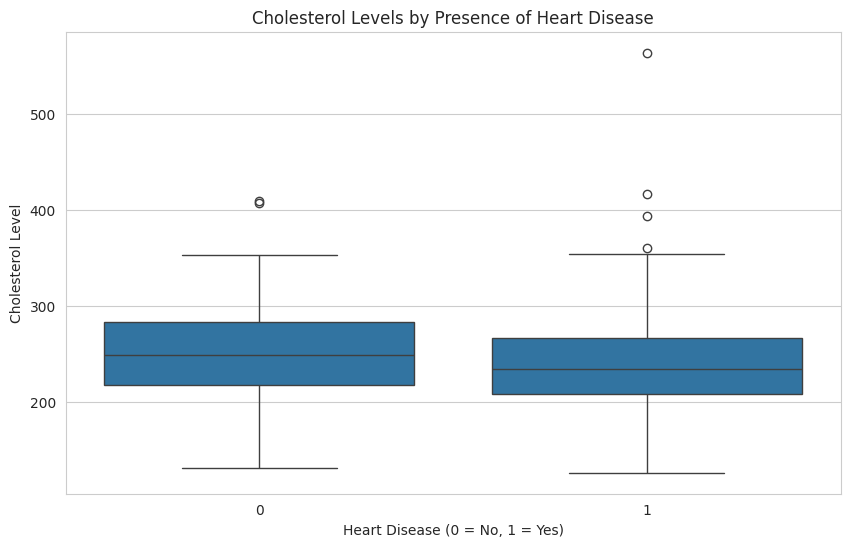

In [ ]:
# Box plot for cholesterol levels by presence of heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Presence of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

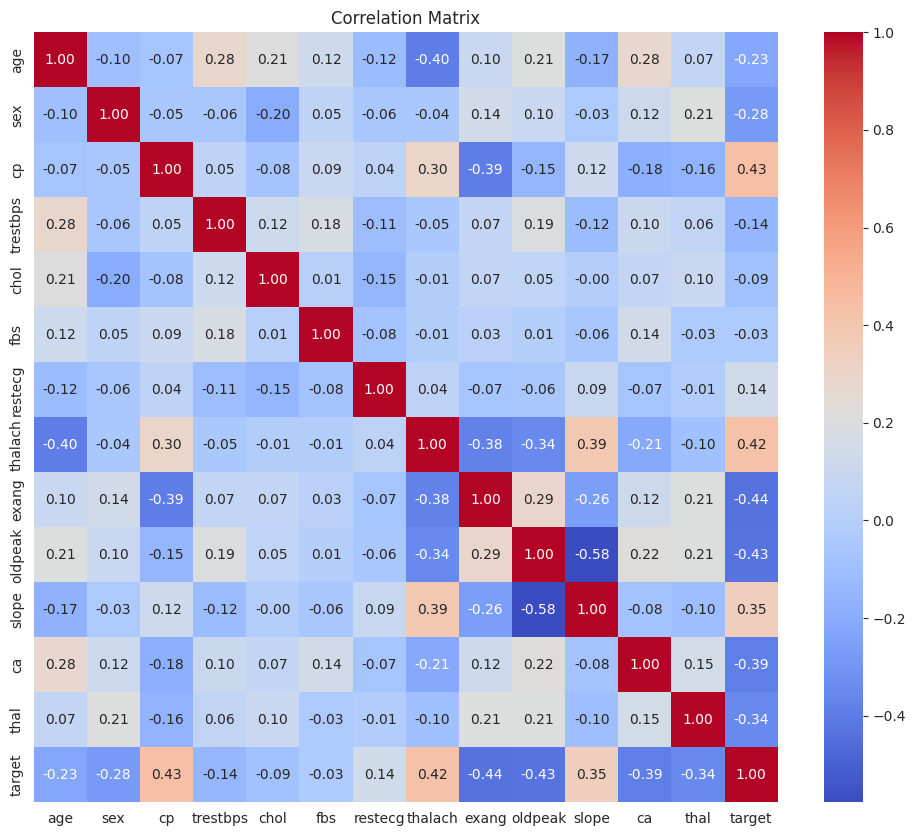

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

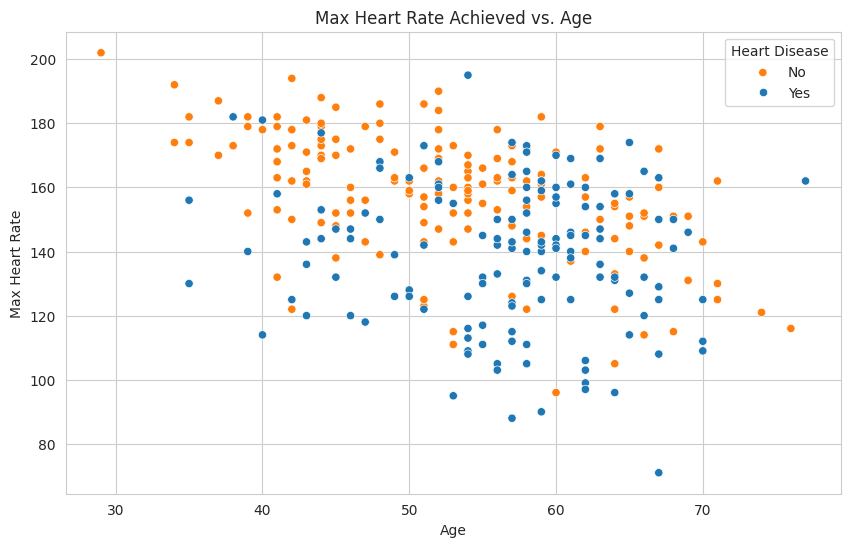

In [ ]:
# Scatter plot of maximum heart rate achieved vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=df, hue='target')
plt.title('Max Heart Rate Achieved vs. Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [ ]:
# Convert the Pandas DataFrame to a PySpark DataFrame
heartDf = spark.createDataFrame(df)

# Show the first few rows of the PySpark DataFrame
heartDf.show()
# Assuming heartDF is your PySpark DataFrame
heartDF.select("age", "sex", "cp", "trestbps", "chol").describe().show()


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [ ]:
heartDF.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [ ]:
heartDF.createOrReplaceTempView("HeartData")


In [ ]:
resultDF = spark.sql("SELECT * FROM HeartData")

# To show the results
resultDF.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [ ]:
resultDF = spark.sql("""
SELECT count(sex),
CASE
    WHEN sex = 1 THEN 'Male'
    ELSE 'Female'
END AS sex
FROM HeartData
GROUP BY sex
""")

resultDF.show()


+----------+------+
|count(sex)|   sex|
+----------+------+
|       207|  Male|
|        96|Female|
+----------+------+



In [ ]:
resultDF = spark.sql("""
SELECT count(cp) AS count,
CASE
    WHEN cp = 0 THEN 'Typical angina'
    WHEN cp = 1 THEN 'Atypical angina'
    WHEN cp = 2 THEN 'Non-anginal pain'
    ELSE 'Asymptomatic'
END AS ChestPain
FROM HeartData
GROUP BY cp
""")

resultDF.show()


+-----+----------------+
|count|       ChestPain|
+-----+----------------+
|   50| Atypical angina|
|   23|    Asymptomatic|
|   87|Non-anginal pain|
|  143|  Typical angina|
+-----+----------------+



In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("fbs") \
    .agg(count("fbs").alias("count")) \
    .withColumn("FastingBloodSugar",
                when(col("fbs") == 1, "True")
                .otherwise("False")
               )

resultDF.show()


+---+-----+-----------------+
|fbs|count|FastingBloodSugar|
+---+-----+-----------------+
|  1|   45|             True|
|  0|  258|            False|
+---+-----+-----------------+



In [ ]:
# Plot the temperatures

In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("restecg") \
    .agg(count("restecg").alias("count")) \
    .withColumn("RestingElectrocardioGraphic",
                when(col("restecg") == 0, "Normal")
                .when(col("restecg") == 1, "Abnormality")
                .otherwise("Left Ventricular Hypertrophy")
               )

resultDF.show()


+-------+-----+---------------------------+
|restecg|count|RestingElectrocardioGraphic|
+-------+-----+---------------------------+
|      1|  152|                Abnormality|
|      2|    4|       Left Ventricular ...|
|      0|  147|                     Normal|
+-------+-----+---------------------------+



In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("exang") \
    .agg(count("exang").alias("count")) \
    .withColumn("ExerciseInducedAngina",
                when(col("exang") == 0, "Not Induced")
                .otherwise("Induced")
               )

resultDF.show()


+-----+-----+---------------------+
|exang|count|ExerciseInducedAngina|
+-----+-----+---------------------+
|    1|   99|              Induced|
|    0|  204|          Not Induced|
+-----+-----+---------------------+



In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("slope") \
    .agg(count("slope").alias("count")) \
    .withColumn("Slope",
                when(col("slope") == 0, "Upsloping")
                .when(col("slope") == 1, "Flat")
                .otherwise("Downsloping")
               )

resultDF.show()


+-----------+-----+
|      Slope|count|
+-----------+-----+
|       Flat|  140|
|Downsloping|  142|
|  Upsloping|   21|
+-----------+-----+



In [ ]:
from pyspark.sql.functions import col, count

resultDF = heartDF.groupBy("ca") \
    .agg(count("ca").alias("count")) \
    .orderBy("ca")

resultDF.show()


+---+-----+
| ca|count|
+---+-----+
|  0|  175|
|  1|   65|
|  2|   38|
|  3|   20|
|  4|    5|
+---+-----+



In [ ]:
from pyspark.sql.functions import col, count

resultDF = heartDF.groupBy("thal") \
    .agg(count("thal").alias("count")) \
    .orderBy("thal")

resultDF.show()


+----+-----+
|thal|count|
+----+-----+
|   0|    2|
|   1|   18|
|   2|  166|
|   3|  117|
+----+-----+



In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("sex", "target") \
    .agg(count("sex").alias("sex_count"),
         count("target").alias("target_count")) \
    .withColumn("Sex",
                when(col("sex") == 0, "Female").otherwise("Male")) \
    .withColumn("DiseaseStatus",
                when(col("target") == 0, "No Disease").otherwise("Has Disease")) \
    .orderBy("sex", "target")

resultDF.show()


+------+------+---------+------------+-------------+
|   Sex|target|sex_count|target_count|DiseaseStatus|
+------+------+---------+------------+-------------+
|Female|     0|       24|          24|   No Disease|
|Female|     1|       72|          72|  Has Disease|
|  Male|     0|      114|         114|   No Disease|
|  Male|     1|       93|          93|  Has Disease|
+------+------+---------+------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("cp", "target") \
    .agg(count("cp").alias("cp_count"),
         count("target").alias("target_count")) \
    .withColumn("ChestPain",
                when(col("cp") == 0, "Typical angina")
                .when(col("cp") == 1, "Atypical angina")
                .when(col("cp") == 2, "Non-anginal pain")
                .otherwise("Asymptomatic")) \
    .withColumn("DiseaseStatus",
                when(col("target") == 0, "No Disease").otherwise("Has Disease")) \
    .orderBy("cp")

resultDF.show()



+---+------+--------+------------+----------------+-------------+
| cp|target|cp_count|target_count|       ChestPain|DiseaseStatus|
+---+------+--------+------------+----------------+-------------+
|  0|     0|     104|         104|  Typical angina|   No Disease|
|  0|     1|      39|          39|  Typical angina|  Has Disease|
|  1|     0|       9|           9| Atypical angina|   No Disease|
|  1|     1|      41|          41| Atypical angina|  Has Disease|
|  2|     1|      69|          69|Non-anginal pain|  Has Disease|
|  2|     0|      18|          18|Non-anginal pain|   No Disease|
|  3|     1|      16|          16|    Asymptomatic|  Has Disease|
|  3|     0|       7|           7|    Asymptomatic|   No Disease|
+---+------+--------+------------+----------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

resultDF = heartDF.groupBy("fbs", "target") \
    .agg(count("fbs").alias("fbs_count"),
         count("target").alias("target_count")) \
    .withColumn("FastingBloodSugar",
                when(col("fbs") == 1, "True").otherwise("False")) \
    .withColumn("DiseaseStatus",
                when(col("target") == 0, "No Disease").otherwise("Has Disease")) \
    .orderBy("fbs")

resultDF.show()


+---+------+---------+------------+-----------------+-------------+
|fbs|target|fbs_count|target_count|FastingBloodSugar|DiseaseStatus|
+---+------+---------+------------+-----------------+-------------+
|  0|     0|      116|         116|            False|   No Disease|
|  0|     1|      142|         142|            False|  Has Disease|
|  1|     0|       22|          22|             True|   No Disease|
|  1|     1|       23|          23|             True|  Has Disease|
+---+------+---------+------------+-----------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

# Aggregate and count occurrences
aggDF = heartDF.groupBy("fbs", "target") \
    .agg(count("fbs").alias("count_fbs"),
         count("target").alias("count_target"))

# Apply conditional logic to categorize 'fbs' and 'target'
resultDF = aggDF \
    .withColumn("FastingBloodSugar", when(col("fbs") == 1, "True").otherwise("False")) \
    .withColumn("DiseaseStatus", when(col("target") == 0, "No Disease").otherwise("Has Disease")) \
    .orderBy("fbs")

resultDF.show()


+---+------+---------+------------+-----------------+-------------+
|fbs|target|count_fbs|count_target|FastingBloodSugar|DiseaseStatus|
+---+------+---------+------------+-----------------+-------------+
|  0|     0|      116|         116|            False|   No Disease|
|  0|     1|      142|         142|            False|  Has Disease|
|  1|     0|       22|          22|             True|   No Disease|
|  1|     1|       23|          23|             True|  Has Disease|
+---+------+---------+------------+-----------------+-------------+



In [ ]:
from pyspark.sql.functions import col, count, when

# Group by 'fbs' and 'target', and count occurrences
groupedDF = heartDF.groupBy("fbs", "target").agg(
    count("fbs").alias("count_fbs"),
    count("target").alias("count_target")
)

# Apply conditional logic for 'FastingBloodSugar' and 'DiseaseStatus'
resultDF = groupedDF.withColumn(
    "FastingBloodSugar",
    when(col("fbs") == 1, "True").otherwise("False")
).withColumn(
    "DiseaseStatus",
    when(col("target") == 0, "No Disease").otherwise("Has Disease")
).orderBy("fbs")

resultDF.show()


+---+------+---------+------------+-----------------+-------------+
|fbs|target|count_fbs|count_target|FastingBloodSugar|DiseaseStatus|
+---+------+---------+------------+-----------------+-------------+
|  0|     0|      116|         116|            False|   No Disease|
|  0|     1|      142|         142|            False|  Has Disease|
|  1|     0|       22|          22|             True|   No Disease|
|  1|     1|       23|          23|             True|  Has Disease|
+---+------+---------+------------+-----------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

# Aggregate and count occurrences
aggDF = heartDF.groupBy("restecg", "target").agg(
    count("restecg").alias("count_restecg"),
    count("target").alias("count_target")
)

# Apply conditional logic for 'RestingElectrocardioGraphic' and 'DiseaseStatus'
resultDF = aggDF \
    .withColumn("RestingElectrocardioGraphic",
                when(col("restecg") == 0, "Normal")
                .when(col("restecg") == 1, "Abnormality")
                .otherwise("Left Ventricular Hypertrophy")) \
    .withColumn("DiseaseStatus",
                when(col("target") == 0, "No Disease").otherwise("Has Disease")) \
    .orderBy("restecg")

resultDF.show()


+-------+------+-------------+------------+---------------------------+-------------+
|restecg|target|count_restecg|count_target|RestingElectrocardioGraphic|DiseaseStatus|
+-------+------+-------------+------------+---------------------------+-------------+
|      0|     0|           79|          79|                     Normal|   No Disease|
|      0|     1|           68|          68|                     Normal|  Has Disease|
|      1|     0|           56|          56|                Abnormality|   No Disease|
|      1|     1|           96|          96|                Abnormality|  Has Disease|
|      2|     1|            1|           1|       Left Ventricular ...|  Has Disease|
|      2|     0|            3|           3|       Left Ventricular ...|   No Disease|
+-------+------+-------------+------------+---------------------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

# Aggregate and count occurrences
aggDF = heartDF.groupBy("exang", "target").agg(
    count("exang").alias("count_exang"),
    count("target").alias("count_target")
)

# Apply conditional logic for 'ExerciseInducedAngina' and 'DiseaseStatus'
resultDF = aggDF \
    .withColumn("ExerciseInducedAngina",
                when(col("exang") == 0, "Not Induced").otherwise("Induced")) \
    .withColumn("DiseaseStatus",
                when(col("target") == 0, "No Disease").otherwise("Has Disease")) \
    .orderBy("exang")

resultDF.show()


+-----+------+-----------+------------+---------------------+-------------+
|exang|target|count_exang|count_target|ExerciseInducedAngina|DiseaseStatus|
+-----+------+-----------+------------+---------------------+-------------+
|    0|     0|         62|          62|          Not Induced|   No Disease|
|    0|     1|        142|         142|          Not Induced|  Has Disease|
|    1|     0|         76|          76|              Induced|   No Disease|
|    1|     1|         23|          23|              Induced|  Has Disease|
+-----+------+-----------+------------+---------------------+-------------+



In [ ]:
from pyspark.sql.functions import col, count, when

# Group by 'slope' and 'target', and perform counts
aggDF = heartDF.groupBy("slope", "target").agg(
    count("slope").alias("count_slope"),
    count("target").alias("count_target")
)

# Apply conditional logic for 'Slope' and 'DiseaseStatus'
resultDF = aggDF.withColumn(
    "Slope",
    when(col("slope") == 0, "Upsloping")
    .when(col("slope") == 1, "Flat")
    .otherwise("Downsloping")
).withColumn(
    "DiseaseStatus",
    when(col("target") == 0, "No Disease").otherwise("Has Disease")
).orderBy("slope")

resultDF.show()


+-----------+------+-----------+------------+-------------+
|      Slope|target|count_slope|count_target|DiseaseStatus|
+-----------+------+-----------+------------+-------------+
|Downsloping|     1|        107|         107|  Has Disease|
|Downsloping|     0|         35|          35|   No Disease|
|       Flat|     0|         91|          91|   No Disease|
|       Flat|     1|         49|          49|  Has Disease|
|  Upsloping|     0|         12|          12|   No Disease|
|  Upsloping|     1|          9|           9|  Has Disease|
+-----------+------+-----------+------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

# Perform groupBy and count operations
aggDF = heartDF.groupBy("ca", "target").agg(
    count("ca").alias("ca_count"),
    count("target").alias("target_count")
)

# Apply conditional logic for 'DiseaseStatus'
resultDF = aggDF.withColumn(
    "DiseaseStatus",
    when(col("target") == 0, "No Disease").otherwise("Has Disease")
).orderBy("ca")

resultDF.show()


+---+------+--------+------------+-------------+
| ca|target|ca_count|target_count|DiseaseStatus|
+---+------+--------+------------+-------------+
|  0|     0|      45|          45|   No Disease|
|  0|     1|     130|         130|  Has Disease|
|  1|     0|      44|          44|   No Disease|
|  1|     1|      21|          21|  Has Disease|
|  2|     1|       7|           7|  Has Disease|
|  2|     0|      31|          31|   No Disease|
|  3|     1|       3|           3|  Has Disease|
|  3|     0|      17|          17|   No Disease|
|  4|     0|       1|           1|   No Disease|
|  4|     1|       4|           4|  Has Disease|
+---+------+--------+------------+-------------+



In [ ]:
from pyspark.sql.functions import when, col, count

# Perform groupBy and count operations
aggDF = heartDF.groupBy("thal", "target").agg(
    count("thal").alias("thal_count"),
    count("target").alias("target_count")
)

# Apply conditional logic for 'DiseaseStatus'
resultDF = aggDF.withColumn(
    "DiseaseStatus",
    when(col("target") == 0, "No Disease").otherwise("Has Disease")
).orderBy("thal")

resultDF.show()


+----+------+----------+------------+-------------+
|thal|target|thal_count|target_count|DiseaseStatus|
+----+------+----------+------------+-------------+
|   0|     0|         1|           1|   No Disease|
|   0|     1|         1|           1|  Has Disease|
|   1|     0|        12|          12|   No Disease|
|   1|     1|         6|           6|  Has Disease|
|   2|     1|       130|         130|  Has Disease|
|   2|     0|        36|          36|   No Disease|
|   3|     1|        28|          28|  Has Disease|
|   3|     0|        89|          89|   No Disease|
+----+------+----------+------------+-------------+



In [ ]:
ageDF = heartDF.select("age")
ageDF.show()


+---+
|age|
+---+
| 63|
| 37|
| 41|
| 56|
| 57|
| 57|
| 56|
| 44|
| 52|
| 57|
| 54|
| 48|
| 49|
| 64|
| 58|
| 50|
| 58|
| 66|
| 43|
| 69|
+---+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import when, col

# Create a new DataFrame with an additional column for age categories
ageCategorizedDF = heartDF.withColumn("AgeGroup",
                                      when((col("age") >= 29) & (col("age") < 40), "Young Ages")
                                      .when((col("age") >= 40) & (col("age") < 55), "Middle Ages")
                                      .otherwise("Elderly Ages"))

# Now, perform the grouping and counting operation
resultDF = ageCategorizedDF.groupBy("AgeGroup").count()

resultDF.show()


+------------+-----+
|    AgeGroup|count|
+------------+-----+
| Middle Ages|  128|
|Elderly Ages|  159|
|  Young Ages|   16|
+------------+-----+



In [ ]:
from pyspark.sql.functions import when, col

# Create new columns based on conditions
resultDF = heartDF.withColumn("Age",
                              when((col("age") >= 29) & (col("age") < 40), "Young Ages")
                              .when((col("age") >= 40) & (col("age") < 55), "Middle Ages")
                              .otherwise("Elderly Ages")) \
                  .withColumn("Sex",
                              when(col("sex") == 1, "Male")
                              .otherwise("Female"))

# Select the newly created columns
resultDF = resultDF.select("Age", "Sex")

resultDF.show()


+------------+------+
|         Age|   Sex|
+------------+------+
|Elderly Ages|  Male|
|  Young Ages|  Male|
| Middle Ages|Female|
|Elderly Ages|  Male|
|Elderly Ages|Female|
|Elderly Ages|  Male|
|Elderly Ages|Female|
| Middle Ages|  Male|
| Middle Ages|  Male|
|Elderly Ages|  Male|
| Middle Ages|  Male|
| Middle Ages|Female|
| Middle Ages|  Male|
|Elderly Ages|  Male|
|Elderly Ages|Female|
| Middle Ages|Female|
|Elderly Ages|Female|
|Elderly Ages|Female|
| Middle Ages|  Male|
|Elderly Ages|Female|
+------------+------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import DecisionTreeClassifier, DecisionTreeClassificationModel
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Assuming heartDF is your DataFrame and SparkSession is already initiated
# Split the data into training and test sets
train, test = heartDF.randomSplit([0.7, 0.3])

# Count the rows in each dataset
train_rows = train.count()
test_rows = test.count()
print("Training Rows:", train_rows, "Testing Rows:", test_rows)

# Assuming your DataFrame has a column "target" for labels and all other columns are features
# First, create a list of your feature columns (i.e., all columns except 'target')
featureCols = [c for c in heartDF.columns if c != 'target']

# Create a VectorAssembler to transform the features into a single vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features")

# Transform the data
train = assembler.transform(train)
test = assembler.transform(test)

# Create a Decision Tree model
dt = DecisionTreeClassifier(labelCol="target", featuresCol="features")

# Train the model using the training data
dtModel = dt.fit(train)

# Make predictions on the test data
predictions = dtModel.transform(test)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = ", accuracy)


Training Rows: 204 Testing Rows: 99
Test Accuracy =  0.7575757575757576


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType


tp = float(predictions.filter("prediction = 1 AND target = 1").count())
fp = float(predictions.filter("prediction = 1 AND target = 0").count())
tn = float(predictions.filter("prediction = 0 AND target = 0").count())
fn = float(predictions.filter("prediction = 0 AND target = 1").count())

# Calculating Precision and Recall as floats
precision = tp / (tp + fp) if tp + fp > 0 else 0.0
recall = tp / (tp + fn) if tp + fn > 0 else 0.0

# Prepare data for the DataFrame
data = [("TP", tp), ("FP", fp), ("TN", tn), ("FN", fn),
        ("Precision", precision), ("Recall", recall)]

# Define schema for the DataFrame to ensure correct data types
schema = StructType([
    StructField("Metric", StringType(), False),
    StructField("Value", FloatType(), False)
])

# Convert list to DataFrame using the defined schema
metrics_df = spark.createDataFrame(data, schema=schema)

metrics_df.show()


+---------+---------+
|   Metric|    Value|
+---------+---------+
|       TP|     52.0|
|       FP|     15.0|
|       TN|     23.0|
|       FN|      9.0|
|Precision|0.7761194|
|   Recall| 0.852459|
+---------+---------+

